<a href="https://colab.research.google.com/github/Boadzie/Jupyter-Notebooks/blob/master/Logo_Brand_Preiction%3B_Pepsi_vs_Coke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

**We have a few images of the product logos of Pepsi and Coca-Cola (Coke). We want to build a basic Deep Learning classifier that can read an image and tell us if it is a logo of Pepsi or Coke.**

### Step 1: Getting the Data

In [0]:
# Download sample images in folder structure for Data Augmentation
!wget -O LOGOS_DATTARAJ.zip https://s3.ap-south-1.amazonaws.com/dattaraj-public/LOGOS_DATTARAJ.zip


--2019-06-05 13:39:37--  https://s3.ap-south-1.amazonaws.com/dattaraj-public/LOGOS_DATTARAJ.zip
Resolving s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)... 52.219.64.45
Connecting to s3.ap-south-1.amazonaws.com (s3.ap-south-1.amazonaws.com)|52.219.64.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1823063 (1.7M) [application/zip]
Saving to: ‘LOGOS_DATTARAJ.zip’

LOGOS_DATTARAJ.zip  100%[===================>]   1.74M  1.24MB/s    in 1.4s    

2019-06-05 13:39:40 (1.24 MB/s) - ‘LOGOS_DATTARAJ.zip’ saved [1823063/1823063]



In [0]:
# Unzipping the folder
!unzip LOGOS_DATTARAJ.zip

Archive:  LOGOS_DATTARAJ.zip
   creating: LOGOS_DATTARAJ/
  inflating: LOGOS_DATTARAJ/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/LOGOS_DATTARAJ/
  inflating: __MACOSX/LOGOS_DATTARAJ/._.DS_Store  
   creating: LOGOS_DATTARAJ/training/
  inflating: LOGOS_DATTARAJ/training/.DS_Store  
   creating: __MACOSX/LOGOS_DATTARAJ/training/
  inflating: __MACOSX/LOGOS_DATTARAJ/training/._.DS_Store  
   creating: LOGOS_DATTARAJ/training/CocaCola/
  inflating: LOGOS_DATTARAJ/training/CocaCola/Screen Shot 2018-11-07 at 5.55.46 PM.png  
   creating: __MACOSX/LOGOS_DATTARAJ/training/CocaCola/
  inflating: __MACOSX/LOGOS_DATTARAJ/training/CocaCola/._Screen Shot 2018-11-07 at 5.55.46 PM.png  
  inflating: LOGOS_DATTARAJ/training/CocaCola/Screen Shot 2018-11-07 at 5.56.01 PM.png  
  inflating: __MACOSX/LOGOS_DATTARAJ/training/CocaCola/._Screen Shot 2018-11-07 at 5.56.01 PM.png  
  inflating: LOGOS_DATTARAJ/training/CocaCola/Screen Shot 2018-11-07 at 5.56.10 PM.png  
  inflating: __MACOSX/LOGO

### Step 2: Data Augmentation to Generate New Images for Training

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

# specify the directories for training and validation images
training_dir = './LOGOS_DATTARAJ/training'
validation_dir = './LOGOS_DATTARAJ/validation'

Using TensorFlow backend.


In [0]:
# we will generate 1 image at a time - we could do so in batches
gen_batch_size = 1

In [0]:
# we will create a generator of generating training data
# we will apply transformations and rotations to new images
# idea is to capture different variations we see in real world
train_datagen = ImageDataGenerator(
          rescale=1./255,
          shear_range=0.2,
          zoom_range=0.2,
          fill_mode = "nearest",
          width_shift_range = 0.3, height_shift_range=0.3, rotation_range=20, horizontal_flip=False)

In [0]:
# this is a generator that will read pictures found in
# subfolders and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
training_dir, # this is the target directory
target_size=(150, 150), batch_size=gen_batch_size, class_mode='binary')

Found 10 images belonging to 2 classes.


In [0]:
# since we use binary_crossentropy loss, we need binary labels
# generator will specify classes by index 0, 1
class_names = ['Coca-Cola', 'Pepsi']

Generating images now...


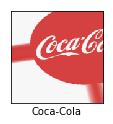

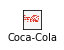

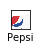

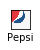

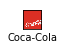

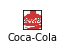

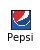

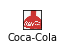

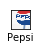

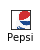

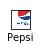

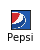

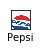

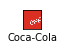

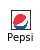

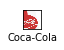

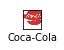

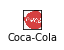

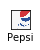

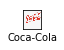

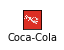

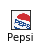

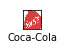

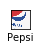

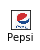

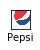

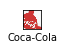

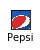

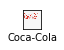

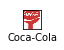

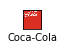

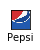

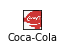

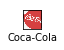

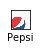

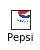

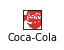

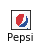

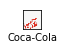

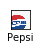

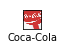

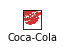

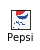

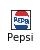

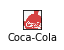

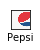

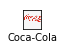

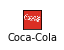

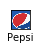

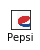

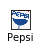

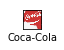

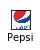

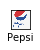

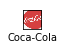

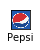

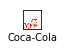

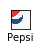

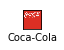

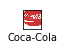

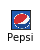

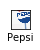

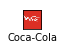

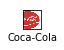

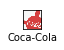

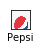

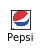

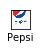

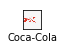

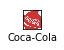

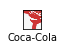

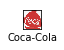

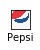

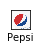

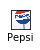

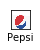

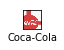

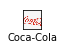

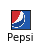

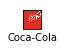

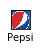

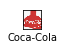

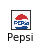

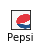

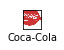

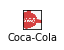

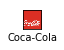

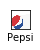

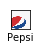

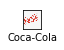

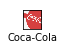

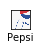

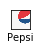

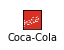

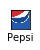

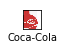

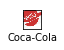

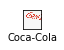

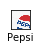

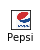

In [0]:
# lets generate some images and plot them
print('Generating images now...')
ROW = 10
plt.figure(figsize=(20,20))
for i in range(ROW*ROW):
  plt.subplot(ROW,ROW,i+1)
  plt.xticks([])

  # run the generator to get the next image – we can do this forever!
  next_set = train_generator.next()
  plt.imshow(next_set[0][0])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(class_names[int(next_set[1][0])])
  plt.show()

### Step 3: Transfer Learning

In [0]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import Model
from keras import optimizers
from keras.applications.vgg16 import VGG16

# set a size of image we will feed to our Model as input
# this is the same size we should have our generator build images
img_width, img_height = 150, 150

In [0]:
# load VGG16 model in headless mode - include_top = False
model = VGG16(weights = "imagenet", include_top=False, input_shape =(img_width, img_height, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# Freeze all the feature-extractor layers which you don't want to train.
for layer in model.layers:
  layer.trainable = False

In [0]:
# Add custom Layers for our Binary Classification problem
x = model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# create final Model which we will use
model_final = Model(input = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
# show summary of this new Model
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Step 4: Create Training and Validation Generators to Load and Normalize Images from Directory

In [0]:
# validation images here
validation_dir = './LOGOS_DATTARAJ/validation'

In [0]:
# we will generate 1 image at a time - we could do so in batches
gen_batch_size = 1

In [0]:
# we will create a generator of generating validation data
# we will apply only scaling to this generator nothing else
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          batch_size=gen_batch_size,
          class_mode='binary')

Found 10 images belonging to 2 classes.


### Step 5: Training The Model

In [0]:
model_final.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [0]:
# Train the model
model_final.fit_generator(
      train_generator,
      steps_per_epoch = 1000,
      epochs = 2,
      validation_data = validation_generator, validation_steps = 100
      )

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
1000/1000 [==============================] - 341s 341ms/step - loss: 0.1218 - acc: 0.9630 - val_loss: 0.7595 - val_acc: 0.8000
Epoch 2/2
1000/1000 [==============================] - 341s 341ms/step - loss: 0.1808 - acc: 0.9750 - val_loss: 1.9115 - val_acc: 0.8000


### Step 6: Make Predictions with Our New Model

In [0]:
# Download 2 test images to validate our Model
test1= "test1.png"

# the second image
test2 = "test2.png"

In [0]:
# The Prediction
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np


# function that reads image, shows it on-screen and makes prediction
def predict_for(img_name):
  # load image from file - VGG16 takes (244,244) input
  myimg = load_img(img_name, target_size=(150, 150))
  plt.imshow(myimg)
  plt.show()
  
  # convert image pixels to array
  myimg = img_to_array(myimg)
  myimg = np.expand_dims(myimg, axis=0)
  
  # prepare image for the VGG model
  myimg = preprocess_input(myimg)
  
  # predict probability for all 1000 classes
  pred = int(model_final.predict(myimg)[0][0])
  print('Prediction for %s: %s'%(img_name, class_names[pred]))

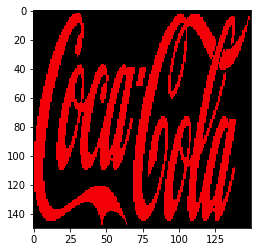

Prediction for test1.png: Coca-Cola


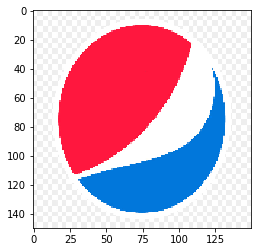

Prediction for test2.jpg: Pepsi


In [0]:
predict_for('test1.png')
predict_for('test2.jpg')

### Step 6: Save the Trained Model to an H5 File

In [0]:
# save the trained Model to a H5 file
model_final.save('my_logo_model.h5')

### Step 7: Load the Saved Model from an H5 file and Make Predictions

In [0]:
from keras.models import load_model


# load Model from saved H5 file
new_model = load_model('my_logo_model.h5')

In [0]:
# download an image to test our model on
image_url = "http://yourblackworld.net/wp-content/uploads/2018/02/pepsi-cans.jpg"

!wget -O test.jpg {image_url}

--2019-06-05 13:56:44--  http://yourblackworld.net/wp-content/uploads/2018/02/pepsi-cans.jpg
Resolving yourblackworld.net (yourblackworld.net)... 184.154.31.58
Connecting to yourblackworld.net (yourblackworld.net)|184.154.31.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62473 (61K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  61.01K  --.-KB/s    in 0.03s   

2019-06-05 13:56:44 (1.84 MB/s) - ‘test.jpg’ saved [62473/62473]



In [0]:
# Now let's do the prediction on this image with new model
# function that reads an image and makes prediction
def new_predict_for(img_name):
  # load image from file - VGG16 takes (244,244) input
  myimg = load_img(img_name, target_size=(150, 150))
  plt.imshow(myimg)
  plt.show()
  
  # convert image pixels to array
  myimg = img_to_array(myimg)
  myimg = np.expand_dims(myimg, axis=0)
  
  # prepare image for the VGG model
  myimg = preprocess_input(myimg)
  
  # predict probability for all 1000 classes
  pred = int(new_model.predict(myimg)[0][0])
  print('Prediction for %s: %s'%(img_name, class_names[pred]))

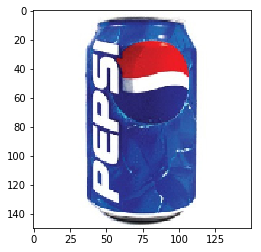

Prediction for test.jpg: Coca-Cola


In [0]:
new_predict_for('test.jpg')

# Flask With Swagger

In [0]:
from keras.models import load_model
from PIL import Image
import numpy as np
from flasgger import Swagger
from flask import Flask, request

app = Flask(__name__)
swagger = Swagger(app)

model = load_model('my_logo_model.h5')

@app.route('/', methods=['POST', 'GET'])
def predict_logo():
    '''
      parameters:
          name: image
          in: forrmData
          type: file
          required: True
    '''
    img = Image.open(request.files['image'])
    img2arr = np.array(img).reshape((1, 1, 28, 28))
    return str(np.argmax(model.predict(img2arr)))


    if __name__== '__main__':
        app.run(port='5000')

In [0]:
# !pip install flasgger